In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def unison_shuffle(a, b):
    if len(a) != len(b):
        raise ValueError('array lengths do not match')
    idx = np.random.permutation(len(a))
    return a[idx], b[idx]

In [4]:
with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

### Prepare the data

In [6]:
# Reshape the data appropriately for further processing
data_x = data_x.reshape(data_x.shape[0], 28, 28)

In [7]:
# Rescale the data to range (0,1) for numerical stability
data_x /= 255.0
test_x /= 255.0

In [8]:
# Reshuffle the data
np.random.seed(472)
X, y = unison_shuffle(data_x, data_y)

In [9]:
# Use 80/20 ratio for train and validation
train_X, train_y = X[:16000], y[:16000]
val_X, val_y = X[16000:], y[16000:]

### Build the model

We will use a dense network with one hidden layer consisting of 128 relu activation units and softmax as the output layer.

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [36]:
n_epochs = 30
early_stopping = EarlyStopping(monitor='loss', patience=3,  min_delta=0.00001)
history = model.fit(train_X, train_y, epochs=n_epochs, callbacks=[early_stopping], verbose=1)

Epoch 1/30
16000/16000 [==============================] - 1s 60us/sample - loss: 5.7800e-06 - acc: 1.0000
Epoch 2/30
16000/16000 [==============================] - 1s 61us/sample - loss: 5.0730e-06 - acc: 1.0000
Epoch 3/30
16000/16000 [==============================] - 1s 54us/sample - loss: 4.4560e-06 - acc: 1.0000
Epoch 4/30
16000/16000 [==============================] - 1s 52us/sample - loss: 3.9578e-06 - acc: 1.0000


Text(0, 0.5, 'Training loss')

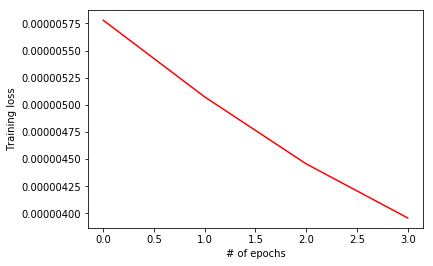

In [39]:
plt.plot(history.epoch, history.history['loss'], 'r')
plt.xlabel('# of epochs')
plt.ylabel('Training loss')

### Validate the model

In [14]:
val_loss, val_acc = model.evaluate(val_X, val_y)

4000/4000 [==============================] - 0s 38us/sample - loss: 0.1340 - acc: 0.9603


In [15]:
print('Validation loss %.2f' % val_loss)
print('Validation accuracy %.2f%%' % val_acc)

Validation loss 0.13
Validation accuracy 0.96%
